In [18]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [19]:
data = pd.read_csv('./MDB.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-10-19,33.00,34.00,29.100,32.07,11508466
1,2017-10-20,33.37,33.37,30.100,30.68,2358653
2,2017-10-23,30.51,31.33,30.190,30.50,749397
3,2017-10-24,30.46,30.92,30.439,30.57,420725
4,2017-10-25,30.50,31.10,29.880,31.00,1219442


In [20]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open   High     Low  Close    Volume
0  2017-10-19  33.00  34.00  29.100  32.07  11508466
1  2017-10-20  33.37  33.37  30.100  30.68   2358653
2  2017-10-23  30.51  31.33  30.190  30.50    749397
3  2017-10-24  30.46  30.92  30.439  30.57    420725
4  2017-10-25  30.50  31.10  29.880  31.00   1219442


In [21]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# # Trading Volume Moving Average: Add moving averages for the Volume
# for ma in ma_day:
#     data[f"Volume_MA_{ma}"] = data['Volume'].rolling(window=ma).mean()



            Date    Open    High       Low   Close    Volume  MA for 5 days  \
0     2017-10-19   33.00   34.00   29.1000   32.07  11508466            NaN   
1     2017-10-20   33.37   33.37   30.1000   30.68   2358653            NaN   
2     2017-10-23   30.51   31.33   30.1900   30.50    749397            NaN   
3     2017-10-24   30.46   30.92   30.4390   30.57    420725            NaN   
4     2017-10-25   30.50   31.10   29.8800   31.00   1219442         30.964   
...          ...     ...     ...       ...     ...       ...            ...   
1800  2024-12-16  264.23  274.71  260.3000  265.63   3020356        281.906   
1801  2024-12-17  266.99  269.49  263.1001  265.10   1782440        276.746   
1802  2024-12-18  264.68  265.13  249.1100  252.67   2576329        267.840   
1803  2024-12-19  252.48  255.90  243.3000  245.00   2601869        259.118   
1804  2024-12-20  241.13  248.57  239.1800  245.63   3307375        254.806   

      MA for 10 days  MA for 20 days  MA for 50 day

,count,mean,std,min,25%,50%,75%,max
Open,1805.0,2.388549e+02,1.327430e+02,25.620000,134.870000,2.305300e+02,3.551600e+02,5.850300e+02
High,1805.0,2.446706e+02,1.355226e+02,26.030000,138.890000,2.358700e+02,3.620300e+02,5.900000e+02
Low,1805.0,2.330721e+02,1.298041e+02,24.620000,131.521600,2.252500e+02,3.490900e+02,5.665701e+02
Close,1805.0,2.388474e+02,1.325226e+02,25.760000,135.320000,2.309500e+02,3.553100e+02,5.850300e+02
Volume,1805.0,1.276362e+06,1.026261e+06,74505.000000,709497.000000,1.057672e+06,1.537746e+06,1.254206e+07
MA for 5 days,1801.0,2.390669e+02,1.321125e+02,26.190000,135.570000,2.297800e+02,3.561220e+02,5.708960e+02
MA for 10 days,1796.0,2.393165e+02,1.316696e+02,26.702000,136.049750,2.297910e+02,3.548055e+02,5.673020e+02
MA for 20 days,1786.0,2.397038e+02,1.307261e+02,27.629500,137.444125,2.352883e+02,3.536349e+02,5.434005e+02
MA for 50 days,1756.0,2.409872e+02,1.281823e+02,28.112600,139.969650,2.408628e+02,3.546304e+02,5.218732e+02
EMA for 5 days,1805.0,2.385992e+02,1.321411e+02,26.438143,134.760239,2.305757e+02,3.563192e+02,5.687741e+02


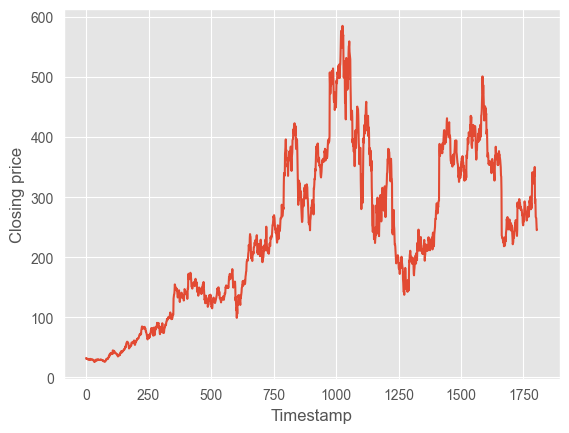

In [22]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [ ]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14
49,2017-12-29,30.35,30.3900,29.5200,29.68,324587,29.254,29.022,28.1060,29.2480,29.414513,29.026543,28.775329,29.299191,64.871017
50,2018-01-02,29.93,30.0800,28.8550,29.25,231621,29.414,29.005,28.1785,29.1916,29.359676,29.067172,28.820536,29.297262,59.552358
51,2018-01-03,29.31,29.4200,28.9400,29.15,256707,29.484,29.090,28.2680,29.1610,29.289784,29.082231,28.851913,29.291487,50.716332
52,2018-01-04,29.29,29.4900,28.9000,29.05,198884,29.474,29.190,28.4130,29.1320,29.209856,29.076371,28.870779,29.282017,59.529148
53,2018-01-05,29.09,29.1350,28.5900,29.05,205632,29.236,29.145,28.5220,29.1016,29.156571,29.071576,28.887848,29.272918,55.651106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2019-12-18,129.29,132.3900,128.5600,129.18,1059895,128.794,129.470,137.4205,131.6157,129.554616,131.005356,132.953574,133.502397,27.692308
545,2019-12-19,130.60,132.9000,128.5700,130.96,861351,130.040,129.429,136.5810,131.5655,130.023077,130.997109,132.763710,133.402695,31.071276
546,2019-12-20,131.25,132.6899,129.6600,130.68,836492,130.494,129.380,135.7915,131.5297,130.242052,130.939453,132.565261,133.295923,40.591023
547,2019-12-23,130.75,133.2900,130.1100,132.36,641720,130.514,129.515,135.0135,131.4507,130.948034,131.197734,132.545713,133.259220,34.024768


In [24]:
# updated Code
# I USED THIS CODE
from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 100

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, 4]  # Normalize using "Close" price
    temp = []
    temp2 = []
    for j in range(window_size):
        # Normalize "Close" and include RSI_14 as a second feature
        normalized_close = (df.iloc[i + j, 4] - first_close) / first_close
        rsi_14 = df.iloc[i + j, -1]  # RSI_14
        temp.append([normalized_close, rsi_14])  # Add both features as a pair
    temp2.append((df.iloc[i + window_size, 4] - first_close) / first_close)  # Use "Close" for target
    X.append(np.array(temp))  # Each sample has shape (100, 2)
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Reshaping the data for CNN models
train_X = train_X.reshape(train_X.shape[0], 1, 100, 2)  # Adding 2 for two features
test_X = test_X.reshape(test_X.shape[0], 1, 100, 2)

# Printing the number of training and testing samples
print(len(train_X))
print(len(test_X))


1323
331


In [25]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [26]:
# load model
from keras.models import load_model
improved_model = load_model('my_model.h5')

In [27]:
# make predictions
predicted  = improved_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_predictions(test_label, predicted, title="Stock Price Prediction"):
    # Create figure and axis with specified size
    plt.figure(figsize=(15, 7))
    
    # Plot actual prices
    plt.plot(test_label, label='Actual Price', color='green')
    
    # Plot predicted prices
    plt.plot(predicted, label='Predicted Price', color='red')
    
    # Customize the plot
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add margins for better visibility
    plt.margins(x=0.02)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show plot
    plt.show()

def evaluate_model(test_label, predicted):
    # Calculate performance metrics
    mse = mean_squared_error(test_label, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_label, predicted)
    mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

    # Print and return performance metrics
    results = {
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Error (MAE)": mae,
        "Mean Absolute Percentage Error (MAPE) in %": mape
    }


    return results



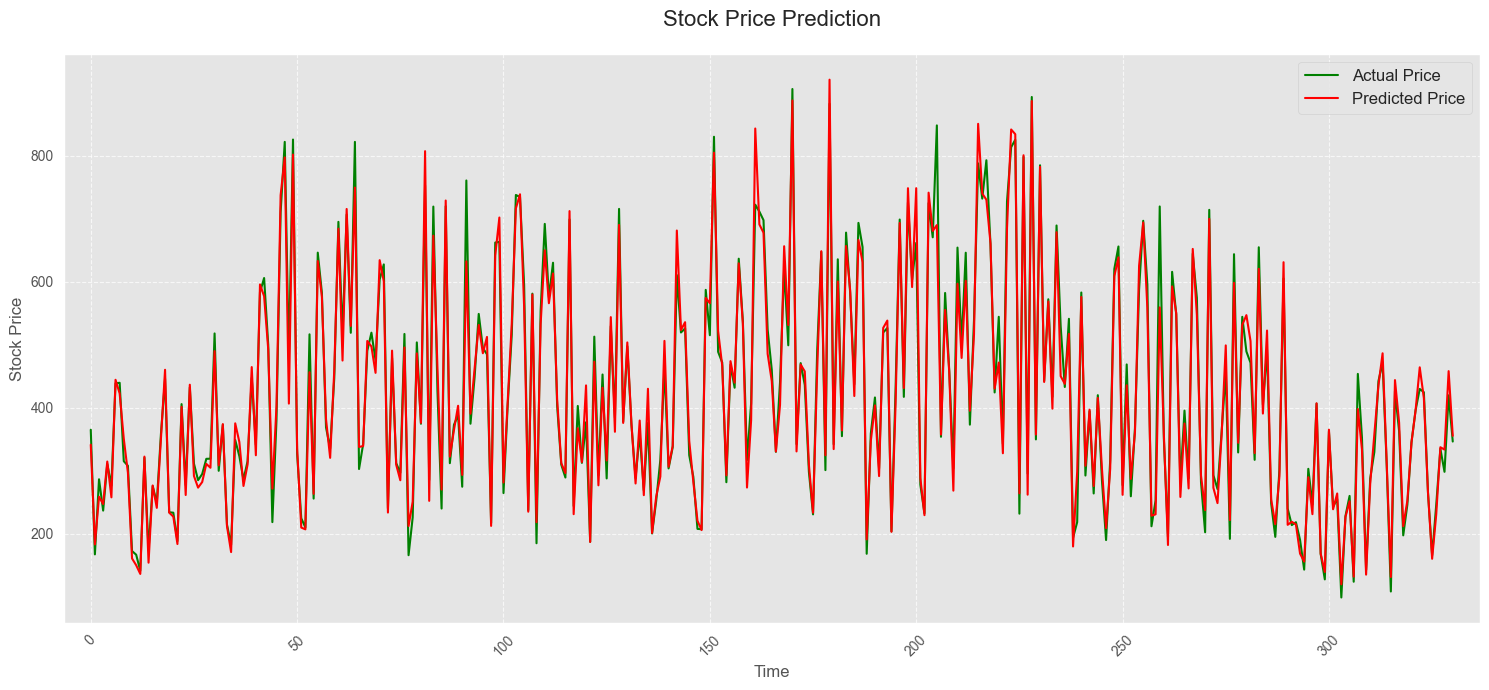

{'Mean Squared Error (MSE)': 825.8689358234541,
 'Root Mean Squared Error (RMSE)': 28.737935482971878,
 'Mean Absolute Error (MAE)': 19.83868328209918,
 'Mean Absolute Percentage Error (MAPE) in %': 5.0170478265327105}

In [29]:
plot_predictions(test_label, predicted, "Stock Price Prediction")
evaluate_model(test_label, predicted)